# 6장. 로지스틱 회귀 모델: 참 거짓 판단하기

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch06-colab.ipynb)

## 5. 텐서플로에서 실행하는 로지스틱 회귀 모델

### 1.환경 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

### 2. 데이터 준비

In [2]:
x = np.array([2, 4, 6, 8, 10, 12, 14]) # 독립변수 (공부한 시간)
y = np.array([0, 0, 0, 1, 1, 1, 1]) # 종속변수 / 0: 불합격, 1: 합격

### 3. 모델 실행

In [4]:
model = Sequential()

model.add(Input(shape=(1, )))

model.add(Dense(1, activation='sigmoid'))

# 이진 분류 손실 함수 - binary_crossentropy 
# 교차 엔트로피 오차 함수를 이용하기 위하여 'binary_crossentropy'로 설정합니다. 
model.compile(optimizer='sgd' ,loss='binary_crossentropy') 

history = model.fit(x, y, epochs=5000, verbose=0)

In [11]:
for epoch, loss in enumerate(history.history['loss']):
    if epoch % 100 == 0:
        print(f"epoch: {epoch + 1}, loss: {loss}")
else:
    print(f"epoch: {epoch + 1}, loss: {loss}")

epoch: 1, loss: 2.7409586906433105
epoch: 101, loss: 0.4987276494503021
epoch: 201, loss: 0.4744851887226105
epoch: 301, loss: 0.4553306996822357
epoch: 401, loss: 0.43770304322242737
epoch: 501, loss: 0.4214615225791931
epoch: 601, loss: 0.4064767360687256
epoch: 701, loss: 0.39263010025024414
epoch: 801, loss: 0.37981414794921875
epoch: 901, loss: 0.3679315149784088
epoch: 1001, loss: 0.3568943440914154
epoch: 1101, loss: 0.3466240465641022
epoch: 1201, loss: 0.3370496928691864
epoch: 1301, loss: 0.32810789346694946
epoch: 1401, loss: 0.31974178552627563
epoch: 1501, loss: 0.3119005262851715
epoch: 1601, loss: 0.3045382797718048
epoch: 1701, loss: 0.2976141571998596
epoch: 1801, loss: 0.2910911738872528
epoch: 1901, loss: 0.2849365770816803
epoch: 2001, loss: 0.2791203558444977
epoch: 2101, loss: 0.27361568808555603
epoch: 2201, loss: 0.2683984339237213
epoch: 2301, loss: 0.2634465992450714
epoch: 2401, loss: 0.2587403953075409
epoch: 2501, loss: 0.2542618215084076
epoch: 2601, loss:

### 4. 모델 테스트

1/1 [==============================] - 0s 60ms/step


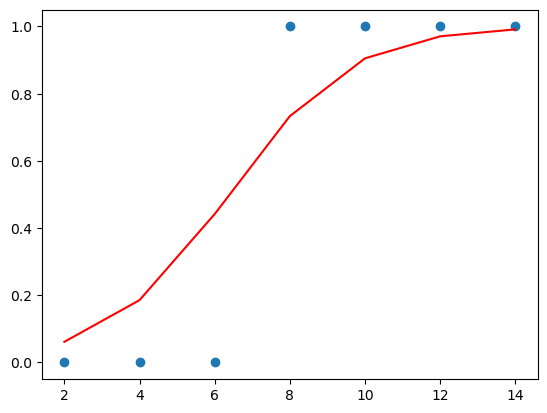

In [9]:
#그래프로 확인해 봅니다.

plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')
plt.show()

In [14]:
#임의의 학습시간을 집어넣어 합격 예상 확률을 예측해 보겠습니다.

hour = 7
prediction = model.predict(np.array([hour]))

print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다" % (hour, prediction * 100))

1/1 [==============================] - 0s 16ms/step
7시간을 공부할 경우, 합격 예상 확률은 59.6%입니다
